In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *

In [2]:
p_data = "../Resources/project_data_final.csv"
p_df = pd.read_csv(p_data)
p_df['Date Completed'] = pd.to_datetime(p_df['Date Completed'])
#p_df = p_df.sort_values('Date Application Received', ascending=True)
p_df = p_df.drop(columns=['Unnamed: 0'])
#p_df.head()


/Users/dmanandhar/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#create analysis data frames
df = p_df[['Project Number','Sector','Date Completed','Expected KWh Annual Production', 'income']]

residential_df = df.loc[df['Sector'] == 'Residential']
residential_df = residential_df.reset_index()
residential_df = residential_df.drop(columns=['index'])
residential_df = residential_df.sort_values('Date Completed', ascending=True)

residential_df.head()

,Project Number,Sector,Date Completed,Expected KWh Annual Production,income
621,2011-156227-SLPR,Residential,2000-12-21,1409,94658.0
124,2011-156225-SLPR,Residential,2000-12-21,1409,87327.0
775,2011-156228-SLPR,Residential,2001-03-07,5165,24300.0
467,2011-156229-SLPR,Residential,2001-03-07,2113,104986.0
826,2011-156239-SLPR,Residential,2001-07-02,2582,90833.0


In [4]:
min_income = residential_df['income'].min()
max_income = residential_df['income'].max()
#print('min income: '+str(min_income) + ' max income: ' + str(max_income))


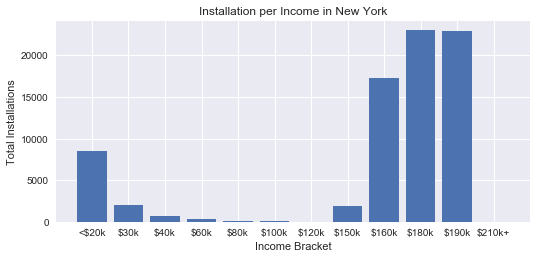

In [5]:
# step = (max_income - min_income)/11
# income_bins = []
# number = min_income
# while number < max_income:
#      income_bins.append(number+step)

plt.style.use('seaborn')


bins = [0, 20000, 40000, 60000,80000, 100000, 120000, 
        140000, 160000, 180000, 200000, 220000 ,240000]
labels = ['<$20k','$30k','$40k','$60k','$80k','$100k',
              '$120k','$150k','$160k', '$180k', '$190k', '$210k+']

test_df = residential_df
test_df['income bins'] = pd.cut(test_df['income'],bins=bins, labels=labels)

projects_per_income_bin = test_df['income bins'].value_counts()
projects_per_income_bin = projects_per_income_bin.to_frame()
projects_per_income_bin = projects_per_income_bin.reset_index()
projects_per_income_bin = projects_per_income_bin.rename(columns={'index':'income bin', 'income bins':'project count'})


x_axis = np.arange(0, len(bins))
plt.figure(figsize=(8.5,3.7))
plt.bar(projects_per_income_bin['income bin'], projects_per_income_bin['project count'])
plt.xticks(x_axis, labels)
plt.xlabel('Income Bracket')
plt.ylabel('Total Installations')
plt.title("Installation per Income in New York")
plt.savefig("Installation_per_income.png")
plt.show()